# Covid-19 Analysis

In [837]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv("worldometer_data.csv")
df2 = pd.read_csv("covid_19_clean_complete.csv")
df2["Date"] = pd.to_datetime(df2["Date"])
pd.set_option('display.max.rows', 300)
pd.set_option('display.max.columns', 50)

In [839]:
#combined the columns for better analysis
df["TotalCases"] = df["TotalCases"] + df["NewCases"].fillna(0)
df["TotalDeaths"] = df["TotalDeaths"] + df["NewDeaths"].fillna(0)
df["TotalRecovered"] = df["TotalRecovered"] + df["NewRecovered"].fillna(0)
df.drop(columns=["NewCases", "NewDeaths", "NewRecovered"], inplace=True)

In [841]:
df.isnull().sum()

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       4
ActiveCases          4
Serious,Critical    87
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
WHO Region          25
dtype: int64

In [843]:
df[df["Continent"].isnull()]

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
156,Diamond Princess,NaN,NaN,712,13,651,48,4,NaN,NaN,NaN,NaN,NaN


In [845]:
df = df.dropna(subset=["Continent"]) 
# removing the specifc value which is not needed
df = df.drop(columns=["Tot Cases/1M pop","Deaths/1M pop","TotalTests","Tests/1M pop","WHO Region"])
#removing the columns which is not needed for my analysis
df.fillna(0, inplace=True) 
#filling all NaN values to 0

In [849]:
df2 = df2.drop(columns=["Province/State","Lat","Long","WHO Region"])

In [853]:
df2["Month"]=df2["Date"].dt.month_name()
df2["Year"]=df2["Date"].dt.year
df2.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Month,Year
0,Afghanistan,2020-01-22,0,0,0,0,January,2020
1,Albania,2020-01-22,0,0,0,0,January,2020
2,Algeria,2020-01-22,0,0,0,0,January,2020
3,Andorra,2020-01-22,0,0,0,0,January,2020
4,Angola,2020-01-22,0,0,0,0,January,2020


In [855]:
data=df.groupby(["Continent","Country/Region"])[["Population","TotalCases","TotalDeaths","TotalRecovered"]].sum()

In [857]:
top3_per_continent = data.groupby(level=0).apply(lambda x: x.nlargest(10, "TotalCases"))
top3_per_continent = top3_per_continent.reset_index(level=0, drop=True)
top3_per_continent[["Population","TotalCases", "TotalDeaths", "TotalRecovered"]]

Population  TotalCases  TotalDeaths  \
Continent         Country/Region                                            
Africa            South Africa          59381566      538184         9604   
                  Egypt                102516525       95006         4951   
                  Nigeria              206606300       45244          930   
                  Ghana                 31133483       39642          199   
                  Algeria               43926079       33626         1273   
                  Morocco               36953359       29644          449   
                  Kenya                 53881160       24411          399   
                  Ethiopia             115223736       20900          365   
                  Cameroon              26606188       17718          391   
                  Ivory Coast           26437950       16447          103   
Asia              India               1381344997     2025409        41638   
                  Iran                  84097623      320117        17976   
                  Saudi Arabia          34865919      284226         3055   
                  Pakistan             221295851      281863         6035   
                  Bangladesh           164851401      249651         3306   
                  Turkey                84428331      237265         5798   
                  Iraq                  40306025      140603         5161   
                  Philippines          109722719      119460         2150   
                  Indonesia            273808365      118753         5521   
                  Qatar                  2807805      112092          178   
Australia/Oceania Australia             25528864       19890          255   
                  New Zealand            5002100        1569           22   
                  Papua New Guinea       8963009         163            3   
                  French Polynesia        281072          64            0   
                  Fiji                    897095          27            1   
                  New Caledonia           285769          22            0   
Europe            Russia               145940924      871894        14606   
                  Spain                 46756648      354530        28500   
                  UK                    67922029      308134        46413   
                  Italy                 60452568      249204        35187   
                  Germany               83811260      215210         9252   
                  France                65288306      195633        30312   
                  Sweden                10105596       81967         5766   
                  Ukraine               43705858       76808         1819   
                  Belgium               11594739       71158         9859   
                  Belarus                9449001       68503          580   
North America     USA                  331198130     5032179       162804   
                  Mexico               129066160      469280        51336   
                  Canada                37775022      118561         8966   
                  Dominican Republic    10858648       76536         1246   
                  Panama                 4321282       71418         1574   
                  Guatemala             17946899       54339         2119   
                  Honduras               9919704       45098         1423   
                  Costa Rica             5098730       21070          200   
                  El Salvador            6489514       19126          513   
                  Haiti                 11416103        7544          171   
South America     Brazil               212710692     2917562        98644   
                  Peru                  33016319      455409        20424   
                  Chile                 19132514      366671         9889   
                  Colombia              50936262      357710        11939   
                  Argentina       

In [859]:
top3_per_continent = top3_per_continent.reset_index()
covid_cases_data = pd.merge(top3_per_continent, df2, how='inner', on='Country/Region')

In [861]:
covid_cases_data.head(20)

,Continent,Country/Region,Population,TotalCases,TotalDeaths,TotalRecovered,Date,Confirmed,Deaths,Recovered,Active,Month,Year
0,Africa,South Africa,59381566,538184,9604,387316,2020-01-22,0,0,0,0,January,2020
1,Africa,South Africa,59381566,538184,9604,387316,2020-01-23,0,0,0,0,January,2020
2,Africa,South Africa,59381566,538184,9604,387316,2020-01-24,0,0,0,0,January,2020
3,Africa,South Africa,59381566,538184,9604,387316,2020-01-25,0,0,0,0,January,2020
4,Africa,South Africa,59381566,538184,9604,387316,2020-01-26,0,0,0,0,January,2020
5,Africa,South Africa,59381566,538184,9604,387316,2020-01-27,0,0,0,0,January,2020
6,Africa,South Africa,59381566,538184,9604,387316,2020-01-28,0,0,0,0,January,2020
7,Africa,South Africa,59381566,538184,9604,387316,2020-01-29,0,0,0,0,January,2020
8,Africa,South Africa,59381566,538184,9604,387316,2020-01-30,0,0,0,0,January,2020
9,Africa,South Africa,59381566,538184,9604,387316,2020-01-31,0,0,0,0,January,2020


In [863]:
graph=covid_cases_data.groupby("Month")[["TotalCases","TotalDeaths","TotalRecovered",]].sum()
graph

,TotalCases,TotalDeaths,TotalRecovered
Month,,,
April,472666080,26143500,313955520
February,456910544,25272050,303490336
January,157555360,8714500,104651840
July,425399472,23529150,282559968
June,472666080,26143500,313955520
March,488421616,27014950,324420704
May,488421616,27014950,324420704


In [865]:
month_order = ["January", "February", "March", "April", "May", "June", "July"]
graph.index = pd.CategoricalIndex(graph.index, categories=month_order, ordered=True)
graph = graph.sort_index()
graph

,TotalCases,TotalDeaths,TotalRecovered
Month,,,
January,157555360,8714500,104651840
February,456910544,25272050,303490336
March,488421616,27014950,324420704
April,472666080,26143500,313955520
May,488421616,27014950,324420704
June,472666080,26143500,313955520
July,425399472,23529150,282559968


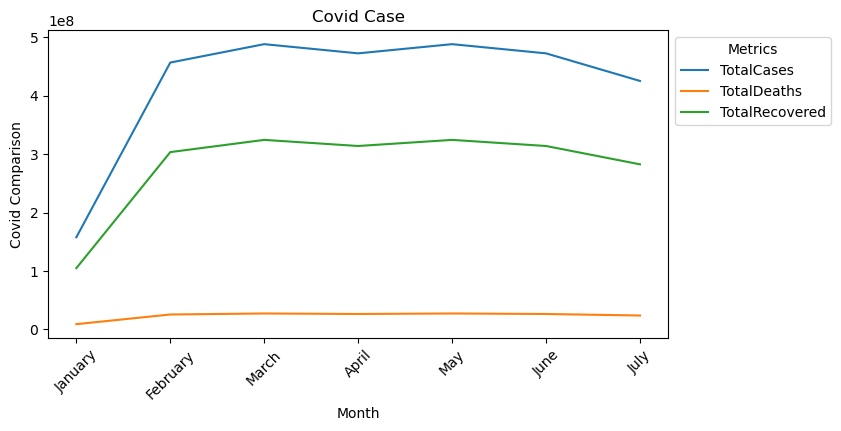

In [867]:
graph.plot(kind="line", figsize=(8, 4))
plt.xlabel("Month")
plt.ylabel("Covid Comparison")
plt.title("Covid Case")
plt.xticks(rotation=45)
plt.legend(title="Metrics", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

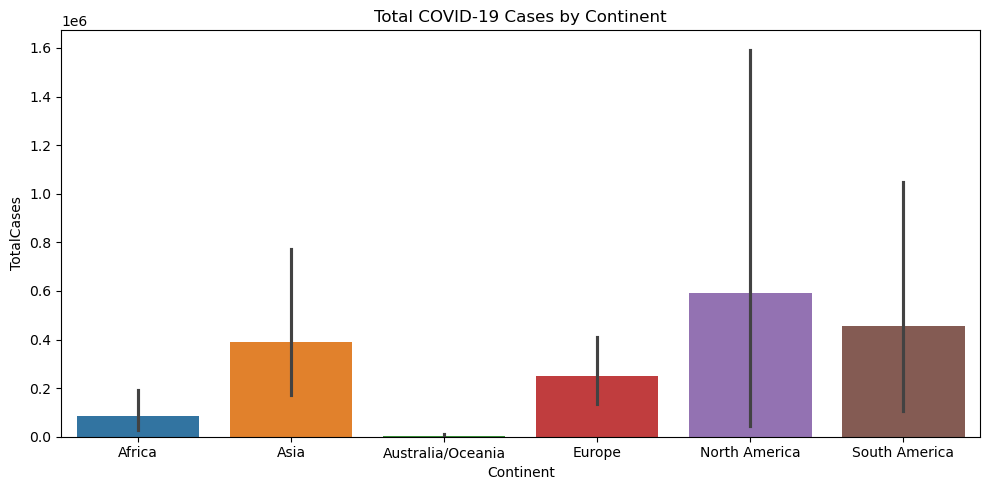

In [869]:
#Total COVID-19 Cases by Continent
plt.figure(figsize=(10, 5))
sns.barplot(data=top3_per_continent.reset_index(), x="Continent", y="TotalCases", hue="Continent")
plt.title("Total COVID-19 Cases by Continent")
plt.tight_layout()
plt.show()

In [871]:
graph2=covid_cases_data.groupby("Month")[["Confirmed","Deaths","Recovered"]].sum()
graph2

,Confirmed,Deaths,Recovered
Month,,,
April,30857108,2420061,9901595
February,7827,320,1051
January,107,0,4
July,229729255,9844391,149435149
June,149339400,7654505,83739293
March,4008011,242561,565534
May,75840117,5086143,34639181


In [873]:
graph2.index = pd.CategoricalIndex(graph2.index, categories=month_order, ordered=True)
graph2 = graph2.sort_index()
graph2

,Confirmed,Deaths,Recovered
Month,,,
January,107,0,4
February,7827,320,1051
March,4008011,242561,565534
April,30857108,2420061,9901595
May,75840117,5086143,34639181
June,149339400,7654505,83739293
July,229729255,9844391,149435149


In [879]:
graph2 = graph2.reset_index()
graph2_melted = graph2.melt(id_vars="Month",value_vars=["Confirmed", "Deaths", "Recovered"],var_name="Category",value_name="Case_Count")
graph2_melted.head()

,Month,Category,Case_Count
0,January,Confirmed,107
1,February,Confirmed,7827
2,March,Confirmed,4008011
3,April,Confirmed,30857108
4,May,Confirmed,75840117


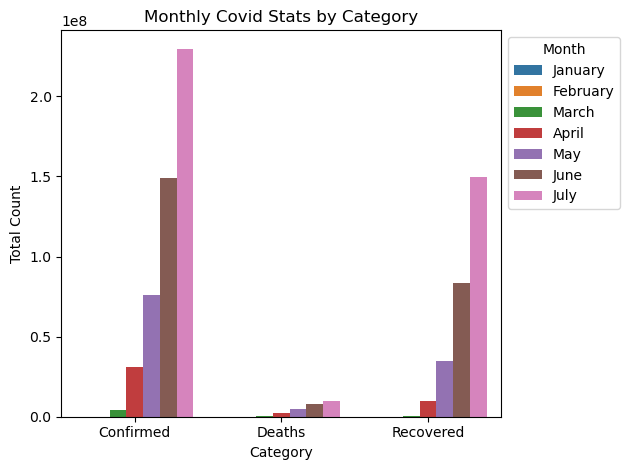

In [877]:
sns.barplot(data=graph2_melted, x="Category", y="Case_Count", hue="Month")
plt.xlabel("Category")
plt.ylabel("Total Count")
plt.title("Monthly Covid Stats by Category")
plt.legend(title="Month", bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()